Homework 2 

By Arjun Patel


Problem 1. (30 points)

Consider a logistic regression problem where x = R^d and y = {0,1}. Derive the weight update rule that maximizes the conditional likelihood assuming that a dataset D = {(x * i, y*i)}^n and i =1 is given. Add explanation of each step
Here are the steps we want to take

1. We need to find the class conditonal probabilities

We can first start by using the sigmoid function, which maps any real number to a value between 0 and 1

σ(x) = 1/(1+e^(-x))

x in this case is the combination of wieghts and features. We can implement the weight variable


Here we are saying "What is the probability of y=1 given x". We update x by using (w^t)*x, which will help us incorporate the weights

P(y=1|x) = σ((w^t)*x) = 1 / (1 + e^(-(w^t)*x))


We also need the probability of y=0 given x. We can do 1 - P(y=1|x)

P(y=0|x) = 1 - P(y=1|x)


2. We need to come up with the likelihood for a single observation:

Now we need to combine both of the probabilities together to get the likelihood for a single observation

We can do this using bernoulli distribution

P(y|x,w) = Ber(y|σ(w^t*x))


We can simplify this function to the following

P(y|x,w) = σ(w^t * x)^y * (1 - σ(w^t*x))^(1-y)


3. Likelihood of training data

Now if we want to look at many obersations, we need to do the product of the single obersation

P(y|x,w) = Πσ(w^t * x)^y * (1 - σ(w^t*x))^(1-y)


We can also convert this into log likelihood by using log

LL = Σ{ylnσ(w^t * x)+(1-y)ln(1-σ(w^t*x))}


4. Maximize the likelihood of w

We can use the arg max to maximize the likelihood

w = arg max Σ{ylnσ(w^t * x)+(1-y)ln(1-σ(w^t*x))}


If we multiply the log likelihood by negative one we can get the logistic loss or cross entropy, which is the error function. Our function before is trying to minimize this function

E(w) = -Σ{ylnσ(w^t * x)+(1-y)ln(1-σ(w^t*x))}


5. Gradient Descent (update w)

Now that we have maximized our likelihood for w, we also need to update w. We can do this by using the last weight - learning rate multiplied by logistic loss

w^k = w^k-1 - ηΔE(w)

Problem 2. (30 points)

The sigmoid function is given as: σ(a) = 1/(1+e^-a). Solve the following questions. 

1.  (5 points) Compute δσ(a)/δw when a = w^t*x, where w, x be an element of R^m

We can take the derivative of the sigmoid function and simplify it to:

δσ(a)/δa = σ(a)(1 - σ(a))


We then subsitute a = w^t*x:

δσ(w^t*x)/δa = σ(w^t*x)(1 - σ(w^t*x))


We can apply the chain rule to get:

δσ(a)/δw = σ(w^t*x)(1 - σ(w^t*x)) * x


2. (10 points) For logistic regression with target variable y be an element of {0, 1}.  Show the posterior of y with given x and w, ie. P(y|x,w)

This is the formula for the posterior

P(y|x,w) = P(x,w|y)*P(y)/P(x,w)


We know P(y=1|x,w) = 1 - σ((w^t)*x), which means:

P(y=1|x,w) = 1 - σ((w^t)*x)

P(y=0|x,w) = 1 - P(y=1|x,w) = 1 - σ((w^t)*x)


If we combine both of these equations, we get:

P(y|x,w) = σ((w^t)*x)^y*(1-σ((w^t)*x))^1-y


3. (15 points) Show the loss function for logistic regression and explain how do we learn w

This is the loss function, also know as our logistic loss or cross entropy (addressed in last problem)

E(w) = Σ{ylnσ(w^t * x)+(1-y)ln(1-σ(w^t*x))}


We learn w by using the logistic loss in gradient descent where η is the learning rate

w^k = w^k-1 - ηΔE(w)


If η is high, this means it will update w more quickly. If η is low, this means it will update w less quickly. We know we have learned w when the loss function cannot decrease significantly between iterations




Problem 3 (40 points)

Access the data set. It contains 100 data points [50 for each class]. Implement Gaussian Discriminant Analysis algorithm to correctly classify each data point. Write code from scratch without using any library except common data manipulation libraries like numpy, pandas etc. Submit your code a python notebook (ipynb).

1. (5 points) Manipulate data as necessary & create a scatter plot using any plotting library [preferably 'matplotlib'].

2. (15 points) Use the following class definition as skeleton of your code.

3. (15 points) Write a function to draw the decision boundary and contours of each class along with the data points. The output would look like as following.

We will need to create some code to look at the data

Current environemnt runs on python 3.11.1

use pip3 install to install on python3

We will install the following by typing this in the terminal:

pip3 instal numpy

pip3 install matplotlib


Using Arjun's adddress
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


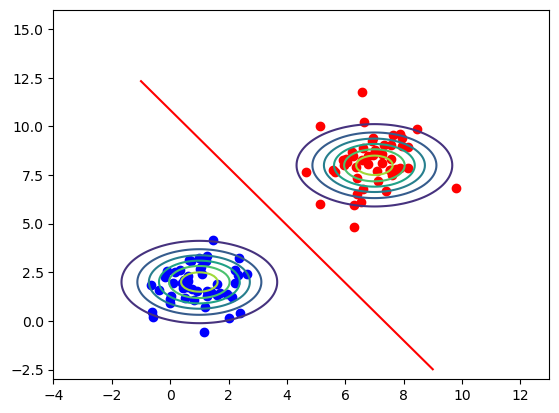

In [238]:
import numpy as np
import matplotlib.pyplot as plt

# Use the class that was given
class GDA():

    # I added inverse sigma for inverse of covariance matrix
    def __init__(self):
        self.pi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma = None
        self.sigma_inv = None

    # Defined train function using x and y
    # This class updates attributes within class
    def train(self, x, y):
        self.pi = np.mean(y)
        self.mu0 = np.mean(x[y[:,0]==0], axis=0)
        self.mu1 = np.mean(x[y[:,0]==1], axis=0)


        n_x = x[y[:,0]==0] - self.mu0
        p_x = x[y[:,0]==1] - self.mu1
        self.sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/x.shape[0]

        self.sigma_inv = np.linalg.inv(self.sigma)

    # Defined predict using x
    # This calculates the probabilities
    def predict(self, x):

        p0 = np.sum(np.dot((x-self.mu0),self.sigma_inv)*(x-self.mu0),axis=1)*self.pi
        p1 = np.sum(np.dot((x-self.mu1),self.sigma_inv)*(x-self.mu1),axis=1)*self.pi
        return p1 >= p0

    # Defined decision line boundary
    # This creates the decision line boundary
    def decision_line_boundary(self):

        # We need to calculate k for our decision line boundary
        # Here we want to multily by 2 because there are 2 separate clusters
        k = 2*self.sigma_inv.dot(self.mu1-self.mu0)

        # We need to calculate the log odds ratio
        b = (self.mu1.T).dot(self.sigma_inv).dot(self.mu1) - (self.mu0.T).dot(self.sigma_inv).dot(self.mu0) + np.log(self.pi) - np.log(1-self.pi)

        # Calculate x1 and x2 for plt
        x1 = np.arange(-1,10,1)
        x2 = (b-k[0]*x1)/k[1]

        # Color line red and draw line
        plt.plot(x1,x2, color='red')
    
    def contours(self):

        # Had to manually find values till it looked correct
        # Create grids for x0, y0, x1, and y1
        gridx0 = np.arange(4, 10, 0.1)
        gridy0 = np.arange(5, 12, 0.1)
        gridx1 = np.arange(-2, 4, 0.1)
        gridy1 = np.arange(-1, 5, 0.1)

        # Meshgrid to get x0, y0, x1, and y1
        x0, y0 = np.meshgrid(gridx0, gridy0)
        x1, y1 = np.meshgrid(gridx1, gridy1)

        # Calculate means
        meanx0 = round(np.mean(x0))
        meany0 = round(np.mean(y0))
        meanx1 = round(np.mean(x1))
        meany1 = round(np.mean(y1))

        # Calculate variances
        variancex0 = self.sigma[0,0]
        variancey0 = self.sigma[1,1]
        variance1x = self.sigma[0,0]
        variance1y = self.sigma[1,1]

        # Calculate z0 and z1 by using probability densities
        z0 = np.exp(-((x0 - meanx0)**2 / (2 * variancex0) + (y0 - meany0)**2) / (2 * variancey0))
        z1 = np.exp(-((x1 - meanx1)**2 / (2 * variance1x) + (y1 - meany1)**2) / (2 * variance1y))
        
        # Create contours
        plt.contour(x0,y0,z0)
        plt.contour(x1,y1,z1)

        
# We need to read the csv and store it as "data"
print("Using Arjun's adddress")
data = np.loadtxt('/Users/arjunpatel/Desktop/School/binary_class_2d.csv',delimiter=",",dtype=np.float64)

# Create data for x and y
data_x = data[:,0:2]
data_y = data[:,2:3]

# Separate groups by 0 and 1
group0 = data[data[:,2]==0]
group1 = data[data[:,2]==1]

# Plot groups and color them blue and red
plt.scatter(group0[:,0],group0[:,1],color='blue')
plt.scatter(group1[:,0],group1[:,1],color='red')

# Create model
model = GDA()

# Train model
model.train(data_x,data_y)

# Create predictions and print them
predictions = model.predict(data_x)
print(predictions)

# Create decision line boundary
model.decision_line_boundary()

# Create contours
model.contours()

# Adjust graph to fit homework description
plt.xlim(-4, 13)
plt.ylim(-3, 16)

# Show the graph
plt.show()



4. Explain the difference between Gaussian Discriminant Analysis and logistic regression as a classifier?

Even though both the Gaussian Discriminant Analysis and logistic regression are both classificaion algorithms, each algorithm has different assumptions and analyzes the data differently. Gaussian Discrimant Analysis assumes the data is normally distributed because it assumes that each class follows a Gaussian distribution while the logistic regression does not have any assumptions about the data. The logistic regression uses the sigmoid function to map the data to each class, which means it does not have any assumptions in the beginning as it is designed to assign the data points to a class. When analyzing the data, Gaussian Discriminant Analysis is more suited for normally distributed data while logistic regression can be better for data that is not normall distributed. This is because of the assumptions both start with, which means logistic regression can be more flexible. Both also have different decision making process. Gaussian Discriminant Analysis applies Bayes' decision while logistic regression uses a threshold to determine whether a data point belongs to a class. This also can influence computational time and its recommended to look at both depending on your dataset. 

When choosing which algorithm to use when looking at the data, you need to understand the data. The main question one should be asking is "is my data normally distributed". If this is the case and the data fits the assumptions of the Gaussian Discrimant Analysis, then using the Gaussian Discrimant Analysis algorithm would be better. If not, then using the logistic regression would be a better fit


Citations:

https://northeastern.instructure.com/courses/146324/pages/25-mins-watch-logistic-regression-mle?module_item_id=8746067
https://northeastern.instructure.com/courses/146324/pages/20-mins-watch-gaussian-discriminative-analysis-mle
https://cs229.stanford.edu/main_notes.pdf
https://github.com/PandeySudeep/GDA
CCIS_CS6140_Lecturenotes_M4L2 (1).pdf
MachineLearningTomMitchell.pdf
Gaussian Discriminant Analysis.pdf
https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf
https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html

